In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import pandas as pd
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from transformers import DataCollatorForSeq2Seq
from transformers import Trainer, TrainingArguments

In [ ]:
dataset = load_dataset("booksouls/booksum-cleaned")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/8145 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1259 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1215 [00:00<?, ? examples/s]

In [ ]:
data_df = dataset['train'].to_pandas()
data_df.rename(columns={'chapter': 'text'}, inplace=True)

data_df.to_csv("data.csv", index=False)
df = pd.read_csv("data.csv")

data = df.sample(n=1500, random_state = 1)

In [ ]:
train_data, eval_data = train_test_split(data, test_size=0.2, random_state=1)

In [ ]:
pipe = pipeline("summarization")
input_text = train_data['text'].iloc[0][:2500]

query = input_text + "\nTL;DR:\n"

pipe_out = pipe(query, max_length=512, clean_up_tokenization_spaces=True)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
pipe_out[0]['summary_text']

" A hall in TIMON'S house is meeting two Of VARRO'S MEN, meeting LUCIUS' SERVANT, and others, being servants of TIMON's creditors, to wait for Timon's comingoutoutout. Then enter TITUS and HORTENSIUS and First VARro's SERVant. The like to you, kind Varro. The likes of Hortensius. And others, all of them being servants. Enter FLAMINIUS  TITUS. And he wears jewels of Timon’s gift, for which I wait for money."

In [ ]:
summaries = {}
pipe = pipeline('summarization', model = 'facebook/bart-large-cnn')
pipe_out = pipe(input_text)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

In [ ]:
print(summaries)

{'bart-large-cnn-400M': "A hall in TIMON'S house. Two Of VARRO'S MEN, meeting LUCIUS' SERVANT, and others, being servants of TIMON's creditors, to wait for his comingout. A strange event. A man wearing jewels of Timon's gift for which I wait for money."}


In [ ]:
models = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(models)
model = AutoModelForSeq2SeqLM.from_pretrained(models)

In [ ]:
text_len = [len(x['text'].split()) for _, x in train_data.iterrows()]
summary_len = [len(x['summary'].split()) for _, x in train_data.iterrows()]

array([[<Axes: title={'center': 'text length'}>,
        <Axes: title={'center': 'summary length'}>]], dtype=object)

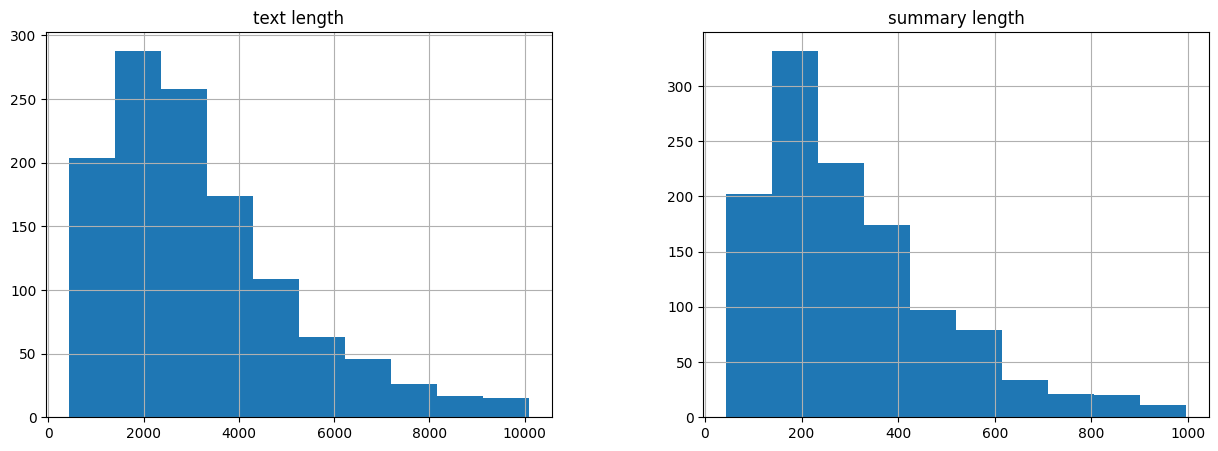

In [ ]:
length_data = pd.DataFrame([text_len, summary_len]).T
length_data.columns = ['text length', 'summary length']

length_data.hist(figsize=(15, 5))

In [ ]:
def get_feature(row):
    encodings = tokenizer(row.get('text', ''),
                          max_length=1024,
                          truncation=True,
                          padding='max_length',
                          return_tensors='pt')
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(row.get('summary', ''),
                           max_length=1024,
                           truncation=True,
                           padding='max_length',
                           return_tensors='pt')

    encodings['labels'] = labels['input_ids']
    return encodings

In [ ]:
train_encodings = train_data.apply(lambda row: get_feature(row), axis=1)
eval_encodings = eval_data.apply(lambda row: get_feature(row), axis=1)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
train_encodings_list = [{
    'input_ids': e['input_ids'].squeeze().tolist(),
    'attention_mask': e['attention_mask'].squeeze().tolist(),
    'labels': e['labels'].squeeze().tolist()
} for e in train_encodings]

eval_encodings_list = [{
    'input_ids': e['input_ids'].squeeze().tolist(),
    'attention_mask': e['attention_mask'].squeeze().tolist(),
    'labels': e['labels'].squeeze().tolist()
} for e in eval_encodings]

train_dataset = Dataset.from_pandas(pd.DataFrame(train_encodings_list))
eval_dataset = Dataset.from_pandas(pd.DataFrame(eval_encodings_list))

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
training_args = TrainingArguments(
    output_dir = 'summarization',
    num_train_epochs = 1,
    warmup_steps = 500,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
    weight_decay = 0.01,
    logging_steps = 10,
    evaluation_strategy='steps',
    eval_steps = 500,
    save_steps = 1e6,
    gradient_accumulation_steps = 16
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=18, training_loss=8.207398096720377, metrics={'train_runtime': 19043.4001, 'train_samples_per_second': 0.063, 'train_steps_per_second': 0.001, 'total_flos': 2496504501633024.0, 'train_loss': 8.207398096720377, 'epoch': 0.96})

In [ ]:
trainer.save_model('summarization_model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [ ]:
from google.colab import files
!zip -r summarization.zip summarization_model
files.download('summarization.zip')

updating: summarization_model/ (stored 0%)
updating: summarization_model/merges.txt (deflated 53%)
updating: summarization_model/tokenizer.json (deflated 72%)
updating: summarization_model/model.safetensors (deflated 8%)
updating: summarization_model/generation_config.json (deflated 48%)
updating: summarization_model/config.json (deflated 61%)
updating: summarization_model/vocab.json (deflated 59%)
updating: summarization_model/tokenizer_config.json (deflated 75%)
updating: summarization_model/training_args.bin (deflated 51%)
updating: summarization_model/special_tokens_map.json (deflated 52%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install torch
!pip install pdfplumber
!pip install python-docx
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 43.9 MB/s eta 0:00:00


In [ ]:
import pdfplumber
import docx
import fitz

pipe = pipeline('summarization', model='summarization_model')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, 'max_length': 256, 'min_length': 128}

def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    text = ""
    for para in doc.paragraphs:
        text += para.text + "\n"
    return text

def extract_text_from_file(file_path, file_type):
    if file_type == 'pdf':
        return extract_text_from_pdf(file_path)
    elif file_type == 'docx':
        return extract_text_from_docx(file_path)
    else:
        return ""

uploaded = files.upload()

for file_name in uploaded.keys():
    file_path = "/content/" + file_name
    file_type = file_name.split('.')[-1].lower()

    text = extract_text_from_file(file_path, file_type)

    summary = pipe(text, **gen_kwargs)


    print(summary[0]['summary_text'])

Saving Humans.docx to Humans (3).docx
Humans (Homo sapiens) or modern humans are the most common and widespread species of primate. They are great apes characterized by their hairlessness, bipedalism, and high intelligence. Humans are highly social, with individual humans tending to belong to a multi-layered network of cooperating, distinct, or even competing social groups – from families and peer groups to corporations and political states. As of May 2024, there are estimated to be more than 8 billion humans alive. Although some scientists equate the term "humans" with all members of the genus Homo, in common usage it generally refers to Homo sapiens, the only extant member.
